In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('logicimmo.csv')
df.head()

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
0,64,3,2,830000,75017,5,1,3,1,1,-1,-1,-1,-1,-1,-1,-1
1,122,5,5,1470000,75015,0,10,3,1,1,1,1,1,1,-1,-1,1
2,5,1,0,65000,75116,5,6,6,1,1,-1,-1,-1,1,1,1,-1
3,7,1,0,80000,75015,0,4,7,1,1,-1,-1,-1,-1,1,-1,-1
4,8,1,0,87000,75006,0,4,6,1,1,-1,-1,-1,1,1,-1,-1


In [20]:
X = df.drop('Prix (Euros)', axis = 1)
y =df['Prix (Euros)']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
X_train_transform = x_sc.fit_transform(X_train)

In [23]:
y_sc = StandardScaler()
y_train_transform = y_sc.fit_transform(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 465000.  470000.  460000.  520000.  398000.  137900.  500000.  575000.
  300000.  535000.  115000.  395000.  365000.  469000.  128000.  531000.
  510000.  425000.  400000.  250000.  230000.  281500.  565000.  378000.
  495000.  347000.  577500.  515000. 1850000.  465000.  343200.  395000.
  260000.  320000.  355000.  499000.  159000.  341000.  500000.  475000.
  450000.  282000.  348000.  399000.  537000.  219000.   80000.  570000.
  265000.  317000.  255000.  370000.  450000.  584000.  327900.  577000.
  449000.  455000.  471000.  435000.  450000.  400000.  519000.  235000.
  320000.  369000.  340000.  440000.  518000.  516000.  440000.  547000.
  399000.  355000.   65000.  455000.  400000.  420000.  365000.  571000.
  430000.  580000.  475000.  465000.  443000.  550000.  395000.  499500.
  135000.  420000.  360000.  437800.  449000.  308000.  570000.  315000.
  460000.  475000.  390000.  288500.  475000.  292600.  449650.  398000.
  695000.  440000.  402000.  237000.  572000.  567000.  174000.  260000.
 1470000.  325000.  390000.  370000.  540000.  165000.  550000.  540000.
  315000.  400000.  400000.  295000.  535000.  217400.  369000.  535000.
  580000.  148000.  470000.  558500.  499900.  197000.  395000.  353600.
  530000.  380000.  495000.  375000.  495000.  455000.  549000.  310000.
  509000.  459000.  320000.  575000.  449000.  410000.  165000.  378900.
  177000.  376000.  492000.  220000.  265000.  460000.  129600.  424000.
  450000.  220000.  563000.  565000.  142000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
from sklearn.svm import SVR
modelSVR_transform = SVR(kernel='rbf')
modelSVR_transform.fit(X_train_transform,y_train)
modelSVR_transform.score(X_test,y_test)

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


-0.008134110399708128

In [25]:
import numpy as np
X_new = np.array([70, 2, 1, 75013, 5, 5, 3, 1, 1, 0, 1, 1, -1, -1, -1, -1]).reshape(1,16)

In [26]:
modelSVR_transform.predict(X_new)

array([420005.47260757])

In [27]:
X = df.drop('Prix (Euros)', axis = 1)
y =df['Prix (Euros)']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [29]:
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train,y_train)
modelSVR.score(X_test,y_test)

-0.11609550295723281

In [30]:
modelSVR.predict(X_new)

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


array([400000.10002937])

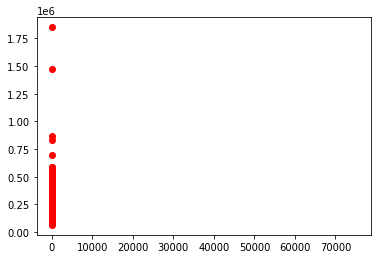

In [31]:
plt.scatter(X['Superficie (m2)'], y, color='red')
plt.plot(X,modelSVR.predict(X),color='blue')

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [58]:
SGD_selector = SelectFromModel(SGDClassifier(random_state=0),threshold='mean')
SGD_selector.fit_transform(X,y)
SGD_selector.get_support()

C:\Users\kju78\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [59]:
SGD_selector.estimator_.coef_.mean(axis=0)

array([-3.05495475e+01, -8.30747095e-01, -5.27893869e-01, -6.07325702e+03,
        7.70887421e-01, -2.35178809e+00,  1.22788091e+00, -8.09348078e-02,
       -8.09348078e-02, -5.42530686e-01,  4.79226753e-01,  3.63692925e-01,
        2.72637603e-02,  9.82143208e-01,  1.08326295e-01, -1.38639124e-01])

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
Linear_selector = SelectFromModel(LinearRegression(),threshold='mean')
Linear_selector.fit_transform(X,y)
Linear_selector.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True])

In [51]:
Ridge_selector = SelectFromModel(Ridge(),threshold='mean')
Ridge_selector.fit_transform(X,y)
Ridge_selector.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True])

In [53]:
Lasso_selector = SelectFromModel(Lasso(),threshold='mean')
Lasso_selector.fit_transform(X,y)
Lasso_selector.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True])

In [56]:
from sklearn import tree
Tree_selector = SelectFromModel(tree.DecisionTreeClassifier(),threshold='mean')
Tree_selector.fit_transform(X,y)
Tree_selector.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False])

In [57]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_selector = SelectFromModel(RandomForestClassifier(n_estimators=10),threshold='mean')
RandomForest_selector.fit_transform(X,y)
RandomForest_selector.get_support()

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [55]:
X.head()

,Superficie (m2),Nombre Pieces,Nombre Chambres,Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
0,64,3,2,75017,5,1,3,1,1,-1,-1,-1,-1,-1,-1,-1
1,122,5,5,75015,0,10,3,1,1,1,1,1,1,-1,-1,1
2,5,1,0,75116,5,6,6,1,1,-1,-1,-1,1,1,1,-1
3,7,1,0,75015,0,4,7,1,1,-1,-1,-1,-1,1,-1,-1
4,8,1,0,75006,0,4,6,1,1,-1,-1,-1,1,1,-1,-1


In [64]:
SVR_selector = SelectFromModel(SVR(kernel='rbf'),threshold='mean')
SVR_selector.fit_transform(X,y)
SVR_selector.get_support()

ValueError: when `importance_getter=='auto'`, the underlying estimator SVR should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [67]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_model.score(X_test,y_test)

0.023809523809523808

In [68]:
RandomForest_model = RandomForestClassifier(n_estimators=10)
RandomForest_model.fit(X_train,y_train)
RandomForest_model.score(X_test,y_test)

0.023809523809523808